# Task

This data set is a original version of the Killed or Seriously Injured (KSI) traffic accident reports from the City of Toronto Police Open Data portal.

It contains information for all traffic accidents reported between 2007 and 2017.

The task here is to figure out the best Classification algorithm to predict whether an accident will cause-
1. Fatal
2. Non-Fatal injury 
3. Damage to Property

based on the features in the given data.

### Dataset and Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_orig= pd.read_csv('KSI.csv')

In [3]:
data_orig.head()

,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,Hour,STREET1,STREET2,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Division,Ward_Name,Ward_ID,Hood_ID,Hood_Name,FID
0,-79.383490,43.651545,6666068,1249781,2011,2011-08-04T04:00:00.000Z,2318,23,QUEEN ST W,YORK ST,...,,,,,D52,Toronto Centre-Rosedale (27),27,76,Bay Street Corridor (76),12001
1,-79.300490,43.780445,7542240,1311542,2012,2012-08-19T04:00:00.000Z,2318,23,SHEPPARD AVE E,AMETHYST RD,...,Yes,,,,D42,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118),12002
2,-79.328266,43.682342,80496257,5002235651,2015,2015-12-30T05:00:00.000Z,2339,23,DANFORTH AVE,GILLARD AVE,...,Yes,,,,D55,Toronto-Danforth (30),30,65,Greenwood-Coxwell (65),12003
3,-79.300490,43.780445,7542241,1311542,2012,2012-08-19T04:00:00.000Z,2318,23,SHEPPARD AVE E,AMETHYST RD,...,Yes,,,,D42,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118),12004
4,-79.300490,43.780445,7542242,1311542,2012,2012-08-19T04:00:00.000Z,2318,23,SHEPPARD AVE E,AMETHYST RD,...,Yes,,,,D42,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118),12005


In [4]:
data_orig.info

<bound method DataFrame.info of                X          Y    Index_      ACCNUM  YEAR  \
0     -79.383490  43.651545   6666068     1249781  2011   
1     -79.300490  43.780445   7542240     1311542  2012   
2     -79.328266  43.682342  80496257  5002235651  2015   
3     -79.300490  43.780445   7542241     1311542  2012   
4     -79.300490  43.780445   7542242     1311542  2012   
...          ...        ...       ...         ...   ...   
12552 -79.367590  43.663245   7408709     1291534  2012   
12553 -79.367590  43.663245   7408710     1291534  2012   
12554 -79.367590  43.663245   7408711     1291534  2012   
12555 -79.363430  43.645874  80545822  6001157650  2016   
12556 -79.363430  43.645874  80545838  6001157650  2016   

                           DATE  TIME  Hour         STREET1         STREET2  \
0      2011-08-04T04:00:00.000Z  2318    23      QUEEN ST W         YORK ST   
1      2012-08-19T04:00:00.000Z  2318    23  SHEPPARD AVE E     AMETHYST RD   
2      2015-12-30T05:0

The dataset has 57 columns (features) and 12557 rows (incidents). Firstly, I will manually remove the columns which will clearly not affect the outcome of a traffic accident.

#### orginal column list

In [5]:
data_orig.columns

Index(['X', 'Y', 'Index_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'Hour', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'District', 'LATITUDE', 'LONGITUDE',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'Division', 'Ward_Name', 'Ward_ID', 'Hood_ID',
       'Hood_Name', 'FID'],
      dtype='object')

#### columns after manual removal

In [6]:
data= pd.read_csv('KSI_clean.csv')

In [7]:
data.head()

,YEAR,DATE,ROAD_CLASS,District,LATITUDE,LONGITUDE,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Ward_Name,Ward_ID,Hood_ID,Hood_Name
0,2011,04-08-2011 09:30,Major Arterial,Toronto East York,43.651545,-79.383490,No,Clear,Natural,Dry,...,,,,,,,Toronto Centre-Rosedale (27),27,76,Bay Street Corridor (76)
1,2012,19-08-2012 09:30,Major Arterial,Scarborough,43.780445,-79.300490,No,Clear,Artificial,Dry,...,Yes,Yes,Yes,,,,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118)
2,2015,30-12-2015 10:30,Major Arterial,Toronto East York,43.682342,-79.328266,No,Clear,Artificial,Dry,...,,,Yes,,,,Toronto-Danforth (30),30,65,Greenwood-Coxwell (65)
3,2012,19-08-2012 09:30,Major Arterial,Scarborough,43.780445,-79.300490,No,Clear,Artificial,Dry,...,Yes,Yes,Yes,,,,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118)
4,2012,19-08-2012 09:30,Major Arterial,Scarborough,43.780445,-79.300490,No,Clear,Artificial,Dry,...,Yes,Yes,Yes,,,,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118)


In [8]:
data.info

<bound method DataFrame.info of        YEAR              DATE      ROAD_CLASS           District   LATITUDE  \
0      2011  04-08-2011 09:30  Major Arterial  Toronto East York  43.651545   
1      2012  19-08-2012 09:30  Major Arterial        Scarborough  43.780445   
2      2015  30-12-2015 10:30  Major Arterial  Toronto East York  43.682342   
3      2012  19-08-2012 09:30  Major Arterial        Scarborough  43.780445   
4      2012  19-08-2012 09:30  Major Arterial        Scarborough  43.780445   
...     ...               ...             ...                ...        ...   
12552  2012  02-03-2012 10:30  Minor Arterial  Toronto East York  43.663245   
12553  2012  02-03-2012 10:30  Minor Arterial  Toronto East York  43.663245   
12554  2012  02-03-2012 10:30  Minor Arterial  Toronto East York  43.663245   
12555  2016  02-07-2016 09:30  Minor Arterial  Toronto East York  43.645874   
12556  2016  02-07-2016 09:30  Minor Arterial  Toronto East York  43.645874   

       LONGITUDE TR

Data in certain columns such as VISIBILTY, TRAFFCTL, LIGHT, RDSFCOND was simplified:

1. TRAFFCTL was simplified to Yes/No rather than specific control names.
2. Classes in VISIBILTY were merged, ex. drifiting snow and snow were merged to class snow.
3. LIGHT was simplified to Natural and Artificial
4. Classes in RDSFCOND were merged, ex. spilled liquid and wet were merged to class wet

## Preprocessing

#### Handling missing values

In [9]:
data.RDSFCOND.fillna(method='ffill', inplace= True)
data.VISIBILITY.fillna(method='ffill', inplace= True)
data.District.fillna(method='ffill',inplace= True)
data.fillna({
    'SPEEDING':'No',
    'AG_DRIV':'No',
    'REDLIGHT':'No',
    'ALCOHOL':'No',
    'DISABILITY':'No',
    'PEDESTRIAN':'No', 
    'CYCLIST':'No', 
    'AUTOMOBILE':'No',
    'MOTORCYCLE':'No', 
    'TRUCK':'No', 
    'TRSN_CITY_VEH':'No', 
    'EMERG_VEH':'No', 
    'PASSENGER':'No'
},inplace= True)

#### Handling dates and time

In [10]:
data.DATE= pd.to_datetime(data.DATE, yearfirst= False, dayfirst= True)
data['DAY_OF_WEEK']= pd.to_datetime(data['DATE']).dt.dayofweek
data['TIME']= pd.to_datetime(data['DATE']).dt.time
data['MONTH']= pd.to_datetime(data['DATE']).dt.month
data['DAY']= pd.to_datetime(data['DATE']).dt.day
data['HOUR']= pd.to_datetime(data['DATE']).dt.hour
data['MINUTES']= pd.to_datetime(data['DATE']).dt.minute
#removing DATE and TIME as they are in datetime format which is not an acceptable format for 
#further processing
data.drop(columns=['DATE','TIME'])

,YEAR,ROAD_CLASS,District,LATITUDE,LONGITUDE,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,...,DISABILITY,Ward_Name,Ward_ID,Hood_ID,Hood_Name,DAY_OF_WEEK,MONTH,DAY,HOUR,MINUTES
0,2011,Major Arterial,Toronto East York,43.651545,-79.383490,No,Clear,Natural,Dry,Non-Fatal Injury,...,,Toronto Centre-Rosedale (27),27,76,Bay Street Corridor (76),3,8,4,9,30
1,2012,Major Arterial,Scarborough,43.780445,-79.300490,No,Clear,Artificial,Dry,Non-Fatal Injury,...,,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118),6,8,19,9,30
2,2015,Major Arterial,Toronto East York,43.682342,-79.328266,No,Clear,Artificial,Dry,Fatal,...,,Toronto-Danforth (30),30,65,Greenwood-Coxwell (65),2,12,30,10,30
3,2012,Major Arterial,Scarborough,43.780445,-79.300490,No,Clear,Artificial,Dry,Non-Fatal Injury,...,,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118),6,8,19,9,30
4,2012,Major Arterial,Scarborough,43.780445,-79.300490,No,Clear,Artificial,Dry,Non-Fatal Injury,...,,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118),6,8,19,9,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,2012,Minor Arterial,Toronto East York,43.663245,-79.367590,No,Clear,Natural,Dry,Non-Fatal Injury,...,,Toronto Centre-Rosedale (28),28,73,Moss Park (73),4,3,2,10,30
12553,2012,Minor Arterial,Toronto East York,43.663245,-79.367590,No,Clear,Natural,Dry,Non-Fatal Injury,...,,Toronto Centre-Rosedale (28),28,73,Moss Park (73),4,3,2,10,30
12554,2012,Minor Arterial,Toronto East York,43.663245,-79.367590,No,Clear,Natural,Dry,Non-Fatal Injury,...,,Toronto Centre-Rosedale (28),28,73,Moss Park (73),4,3,2,10,30
12555,2016,Minor Arterial,Toronto East York,43.645874,-79.363430,No,Clear,Natural,Dry,Fatal,...,,Toronto Centre-Rosedale (28),28,77,Waterfront Communities-The Island (77),5,7,2,9,30


#### Rearranging columns

In [11]:
col_order= ['YEAR','DAY_OF_WEEK', 'MONTH','DAY', 'HOUR', 'MINUTES','LATITUDE', 'LONGITUDE',
            'ROAD_CLASS','VISIBILITY','RDSFCOND','INVAGE','INJURY','TRAFFCTL','LIGHT',
            'District','INITDIR','PEDESTRIAN','CYCLIST', 'AUTOMOBILE','MOTORCYCLE', 'TRUCK', 
            'TRSN_CITY_VEH','EMERG_VEH', 'PASSENGER','SPEEDING', 'AG_DRIV', 'REDLIGHT',
            'ALCOHOL', 'DISABILITY','Ward_ID','Hood_ID','ACCLASS']
data= data.reindex(columns= col_order)

#### Creating features (X) and dependent variable (y)

In [12]:
X= data.iloc[:,:-1]
y= data.iloc[:,-1].values

In [13]:
X

,YEAR,DAY_OF_WEEK,MONTH,DAY,HOUR,MINUTES,LATITUDE,LONGITUDE,ROAD_CLASS,VISIBILITY,...,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Ward_ID,Hood_ID
0,2011,3,8,4,9,30,43.651545,-79.383490,Major Arterial,Clear,...,Yes,,,,,,,,27,76
1,2012,6,8,19,9,30,43.780445,-79.300490,Major Arterial,Clear,...,,,Yes,Yes,Yes,,,,40,118
2,2015,2,12,30,10,30,43.682342,-79.328266,Major Arterial,Clear,...,,,,,Yes,,,,30,65
3,2012,6,8,19,9,30,43.780445,-79.300490,Major Arterial,Clear,...,,,Yes,Yes,Yes,,,,40,118
4,2012,6,8,19,9,30,43.780445,-79.300490,Major Arterial,Clear,...,,,Yes,Yes,Yes,,,,40,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,2012,4,3,2,10,30,43.663245,-79.367590,Minor Arterial,Clear,...,,,,Yes,Yes,,,,28,73
12553,2012,4,3,2,10,30,43.663245,-79.367590,Minor Arterial,Clear,...,,,,Yes,Yes,,,,28,73
12554,2012,4,3,2,10,30,43.663245,-79.367590,Minor Arterial,Clear,...,,,,Yes,Yes,,,,28,73
12555,2016,5,7,2,9,30,43.645874,-79.363430,Minor Arterial,Clear,...,,,Yes,Yes,Yes,,,,28,77


#### Encoding X and y

--> features that are Ordinal, meaning their order has an affect on the severity of the crash, were encoded using the OrdinalEncoder. 
Example: the severity of an injury in the INJURY column has a direct effect on the Fatality of the crash.

--> features that are Non-Ordinal, meaning their order has no affect on the outcome, were encoded with OneHotEncoder.
Example: the direction of travel (North,Sounth,East,West) has no direct affect on the outcome of the crash.

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [15]:
preprocess= make_column_transformer(
                (OrdinalEncoder(),['ROAD_CLASS','VISIBILITY','RDSFCOND','INVAGE','INJURY',
                                  'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE','MOTORCYCLE', 'TRUCK', 
                                   'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER','SPEEDING', 
                                   'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']),
                (OneHotEncoder(),['TRAFFCTL','LIGHT','District','INITDIR']),
                remainder='passthrough')
X= pd.DataFrame(preprocess.fit_transform(X))

In [16]:
le= LabelEncoder()
y= le.fit_transform(y)

In [17]:
X

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,5.0,1.0,1.0,10.0,4.0,1.0,0.0,0.0,0.0,0.0,...,2011.0,3.0,8.0,4.0,9.0,30.0,43.651545,-79.383490,27.0,76.0
1,5.0,1.0,1.0,4.0,2.0,1.0,0.0,1.0,0.0,0.0,...,2012.0,6.0,8.0,19.0,9.0,30.0,43.780445,-79.300490,40.0,118.0
2,5.0,1.0,1.0,12.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2015.0,2.0,12.0,30.0,10.0,30.0,43.682342,-79.328266,30.0,65.0
3,5.0,1.0,1.0,20.0,5.0,1.0,0.0,1.0,0.0,0.0,...,2012.0,6.0,8.0,19.0,9.0,30.0,43.780445,-79.300490,40.0,118.0
4,5.0,1.0,1.0,12.0,4.0,1.0,0.0,1.0,0.0,0.0,...,2012.0,6.0,8.0,19.0,9.0,30.0,43.780445,-79.300490,40.0,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,7.0,1.0,1.0,8.0,1.0,1.0,0.0,0.0,1.0,0.0,...,2012.0,4.0,3.0,2.0,10.0,30.0,43.663245,-79.367590,28.0,73.0
12553,7.0,1.0,1.0,20.0,4.0,1.0,0.0,0.0,1.0,0.0,...,2012.0,4.0,3.0,2.0,10.0,30.0,43.663245,-79.367590,28.0,73.0
12554,7.0,1.0,1.0,5.0,2.0,1.0,0.0,0.0,1.0,0.0,...,2012.0,4.0,3.0,2.0,10.0,30.0,43.663245,-79.367590,28.0,73.0
12555,7.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2016.0,5.0,7.0,2.0,9.0,30.0,43.645874,-79.363430,28.0,77.0


In [18]:
y

array([1, 1, 0, ..., 1, 0, 0])

#### Splitting the data into training and test sets

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.25)

#### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

## Training on different classification models

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

class_ls= LogisticRegression(random_state= 0, max_iter= 500)
class_ls.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=0)

#### Prediction on testing set

In [22]:
y_pred_lr= class_ls.predict(X_test)

In [23]:
cm_lr= confusion_matrix(y_test,y_pred_lr) #confusion matrix
lr_acc= accuracy_score(y_test,y_pred_lr) #accuracy score
print(cm_lr), print(lr_acc)

[[  12  442    0]
 [  13 2669    2]
 [   0    1    1]]
0.8541401273885351


(None, None)

### Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

class_nb= GaussianNB()
class_nb.fit(X_train,y_train)

GaussianNB()

#### Predicting on testing set

In [25]:
y_pred_nb= class_nb.predict(X_test)

In [26]:
cm_nb= confusion_matrix(y_test,y_pred_nb) #confusion matrix
nb_acc= accuracy_score(y_test,y_pred_nb) #accuracy score
print(cm_nb), print(nb_acc)

[[ 388    4   62]
 [2090   82  512]
 [   0    0    2]]
0.1503184713375796


(None, None)

### SVM

In [27]:
from sklearn.svm import SVC

class_svc= SVC(kernel='rbf')
class_svc.fit(X_train,y_train)

SVC()

#### Predicting on testing set

In [28]:
y_pred_svc= class_svc.predict(X_test)

In [29]:
cm_svc= confusion_matrix(y_test,y_pred_svc) #confusion matrix
svc_acc= accuracy_score(y_test,y_pred_svc) #accuracy score
print(cm_svc), print(svc_acc)

[[  44  410    0]
 [   1 2683    0]
 [   0    1    1]]
0.8687898089171975


(None, None)

### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

class_dt= DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
class_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### Predicting on testing set

In [31]:
y_pred_dt= class_dt.predict(X_test)

In [32]:
cm_dt= confusion_matrix(y_test,y_pred_dt) #confusion matrix
dt_acc= accuracy_score(y_test,y_pred_dt) #accuracy score
print(cm_dt), print(dt_acc)

[[ 343  111    0]
 [ 120 2563    1]
 [   0    1    1]]
0.925796178343949


(None, None)

### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

class_rf= RandomForestClassifier(n_estimators= 100, criterion= 'entropy', random_state= 0)
class_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

#### Predicting on testing set

In [34]:
y_pred_rf= class_rf.predict(X_test)

In [35]:
cm_rf= confusion_matrix(y_test,y_pred_rf) #confusion matrix
rf_acc= accuracy_score(y_test,y_pred_rf) #accuracy score
print(cm_rf), print(rf_acc)

[[ 287  167    0]
 [   0 2684    0]
 [   0    0    2]]
0.9468152866242038


(None, None)

### K-NN  

In [36]:
from sklearn.neighbors import KNeighborsClassifier

class_knn= KNeighborsClassifier(n_neighbors= 5,metric= 'minkowski',p= 2) #default param values,
class_knn.fit(X_train,y_train)                                           #included for clarity.

KNeighborsClassifier()

#### Predicting on testing set

In [37]:
y_pred_knn= class_knn.predict(X_test)

In [38]:
cm_knn= confusion_matrix(y_test,y_pred_knn) #confusion matrix
knn_acc= accuracy_score(y_test,y_pred_knn) #accuracy score
print(cm_knn), print(knn_acc)

[[ 122  332    0]
 [  62 2622    0]
 [   0    1    1]]
0.8742038216560509


(None, None)

## Comparing different models 

In [39]:
import matplotlib.pyplot as plt

accuracy_scores= [lr_acc, nb_acc, dt_acc, rf_acc, svc_acc, knn_acc]
algo= ['Logistic Regression','Naive Bayes','Decision Tree','Random Forest',
       'Support Vector Classification', 'K-Nearest Neighbors']

Text(0.5, 0, 'Accuracy Score')

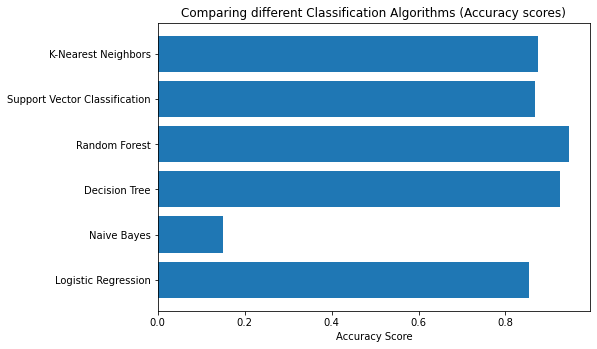

In [40]:
fig= plt.figure()
ax= fig.add_axes([0,0,1,1])
ax.barh(algo,accuracy_scores)
ax.set_title('Comparing different Classification Algorithms (Accuracy scores)')
ax.set_xlabel('Accuracy Score')

## Cross Validation Score

Text(0.5, 0, 'Cross Val Accuracies')

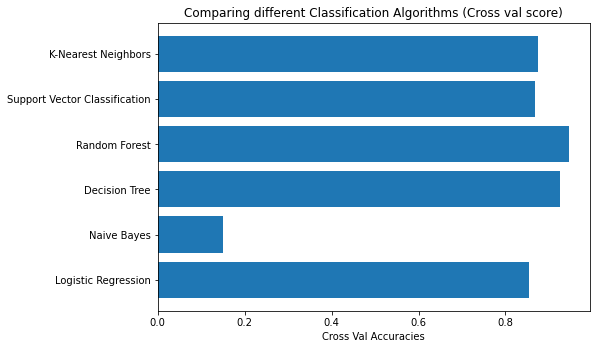

In [41]:
from sklearn.model_selection import cross_val_score

acc_lr= cross_val_score(estimator= class_ls, X= X_train, y= y_train, cv= 10)
acc_nb= cross_val_score(estimator= class_nb, X= X_train, y= y_train, cv= 10)
acc_dt= cross_val_score(estimator= class_dt, X= X_train, y= y_train, cv= 10)
acc_rf= cross_val_score(estimator= class_rf, X= X_train, y= y_train, cv= 10)
acc_knn= cross_val_score(estimator= class_knn, X= X_train, y= y_train, cv= 10)
acc_svc= cross_val_score(estimator= class_svc, X= X_train, y= y_train, cv= 10)

acc_scores= [
    acc_lr.mean(),acc_nb.mean(),acc_dt.mean(),acc_rf.mean(),acc_svc.mean(),acc_knn.mean()]


fig2= plt.figure()
ax2= fig2.add_axes([0,0,1,1])
ax2.barh(algo,accuracy_scores)
ax2.set_title('Comparing different Classification Algorithms (Cross val score)')
ax2.set_xlabel('Cross Val Accuracies')

In [43]:
print(f'''
          Logistic Regression:{acc_lr.mean()*100}
          Naive Bayes:{acc_nb.mean()*100} 
          Decision Tree:{acc_dt.mean()*100} 
          Random Forest:{acc_rf.mean()*100} 
          Support Vector Classification:{acc_svc.mean()*100} 
          K-Nearest Neighbors:{acc_knn.mean()*100}''')


          Logistic Regression:86.726096599588
          Naive Bayes:14.24018131318943 
          Decision Tree:92.120773175756 
          Random Forest:95.03023390664943 
          Support Vector Classification:87.59687823632535 
          K-Nearest Neighbors:88.170284582287


Clearly, Random Forest algorithm is the best choice here. RF models are prone to overfitting but as the test set was completely different than the trainig set we can safely assume that no overfitting occured. The model can be tweaked further (number of trees) for even more accurate predictions. 